# Sensitivity  plotter
A simple notebook to plot some sensitivity curves from pre-defined concepts

To run this on Google Colab:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnGBaker/GWI-metrics/blob/main/Notebooks/sensitivityPlotter.ipynb)

## Sensitivity curve

The sensitivity curve is based on the LISA Sensitivity and SNR Technical Note `LISA-LCST-SGS-TN-001`, available on [arXiv](https://arxiv.org/abs/2108.01167).



### Some basic setup

In [72]:
src='../src/'
!mkdir -p '../plots/'
import numpy as np
import matplotlib.pyplot as plt
import sys
import inspect
sys.path.append(src)
import metrics
import concepts
import constants
import background as bg

/Users/ecastel2/Documents/research/GSFC/gw-imager/GWI-metrics-fork/Notebooks/../src/metrics.py:12: SyntaxWarning: invalid escape sequence '\s'
  '''
/Users/ecastel2/Documents/research/GSFC/gw-imager/GWI-metrics-fork/Notebooks/../src/metrics.py:74: SyntaxWarning: invalid escape sequence '\l'
  '''
/Users/ecastel2/Documents/research/GSFC/gw-imager/GWI-metrics-fork/Notebooks/../src/metrics.py:162: SyntaxWarning: invalid escape sequence '\l'
  '''
/Users/ecastel2/Documents/research/GSFC/gw-imager/GWI-metrics-fork/Notebooks/../src/metrics.py:390: SyntaxWarning: invalid escape sequence '\D'
  Here we construct two elementary figures of merit relevant for imaging, relevant for our imaging incoherent and our astrometric notions of imaging.


### make the plots

In [172]:
# list of concepts you want to make plots of
all_missions = (
        'LISAold',
    'LISACBE',
    'LISASciRDv1',
    'LISASciRDLowLev',
    'TwinLISA',
    'LISAGrande',
    'LISAU',
    'LISAMax',
    'muAres',
    'GoBIGLISA',
    'ALIA',
    'ALIAbender',
    'ALIAcornish',
    'ALIAlowL',
    'ALIAtwin',
    'GoBIGALIA',
    'DECIGO',
    'DOcons', 
)

missions = (
    #'LISACBE',
    #'LISAold',
    'LISASciRDv1',
    #'LISASciRDLowLev',
    'TwinLISA',
    'LISAGrande',
    'LISAU',
    #'LISAMax',
    #'muAres',
    'GoBIGLISA',
    'ALIA',
    #'ALIAbender',
    #'ALIAcornish',
    #'ALIAlowL',
    'ALIAtwin',
    'GoBIGALIA',
    #'DECIGO',
    #'DOcons'
)


# Define a frequency axis
f_mu = -5, 0 
f_m = -4, 0
f_d = -3, 1

faxis = dict(zip(all_missions,(f_m,f_m, f_m, f_m,f_m, f_mu, f_mu, f_mu, f_mu, f_m, f_d, f_d, f_d, f_d, f_d, f_d, f_d)))

/Users/ecastel2/Documents/research/GSFC/gw-imager/GWI-metrics-fork/Notebooks/../src/metrics.py:12: SyntaxWarning: invalid escape sequence '\s'
  '''
/Users/ecastel2/Documents/research/GSFC/gw-imager/GWI-metrics-fork/Notebooks/../src/metrics.py:74: SyntaxWarning: invalid escape sequence '\l'
  '''
/Users/ecastel2/Documents/research/GSFC/gw-imager/GWI-metrics-fork/Notebooks/../src/metrics.py:162: SyntaxWarning: invalid escape sequence '\l'
  '''
/Users/ecastel2/Documents/research/GSFC/gw-imager/GWI-metrics-fork/Notebooks/../src/metrics.py:390: SyntaxWarning: invalid escape sequence '\D'
  '''


### First we plot without the galactic background

In [173]:
faxis

{'LISAold': (-4, 0),
 'LISACBE': (-4, 0),
 'LISASciRDv1': (-4, 0),
 'LISASciRDLowLev': (-4, 0),
 'TwinLISA': (-4, 0),
 'LISAGrande': (-5, 0),
 'LISAU': (-5, 0),
 'LISAMax': (-5, 0),
 'muAres': (-5, 0),
 'GoBIGLISA': (-4, 0),
 'ALIA': (-3, 1),
 'ALIAbender': (-3, 1),
 'ALIAcornish': (-3, 1),
 'ALIAlowL': (-3, 1),
 'ALIAtwin': (-3, 1),
 'GoBIGALIA': (-3, 1),
 'DECIGO': (-3, 1)}

LISASciRDv1
f	S_h
0.0001	2.1134665654979576e-33
0.001	1.633751645280467e-38
0.01	1.4124744403364094e-40
0.1	2.096656544353494e-39
1.0	1.9778548603796396e-37
TwinLISA
LISAGrande
LISAU
GoBIGLISA
ALIA
ALIAtwin
GoBIGALIA


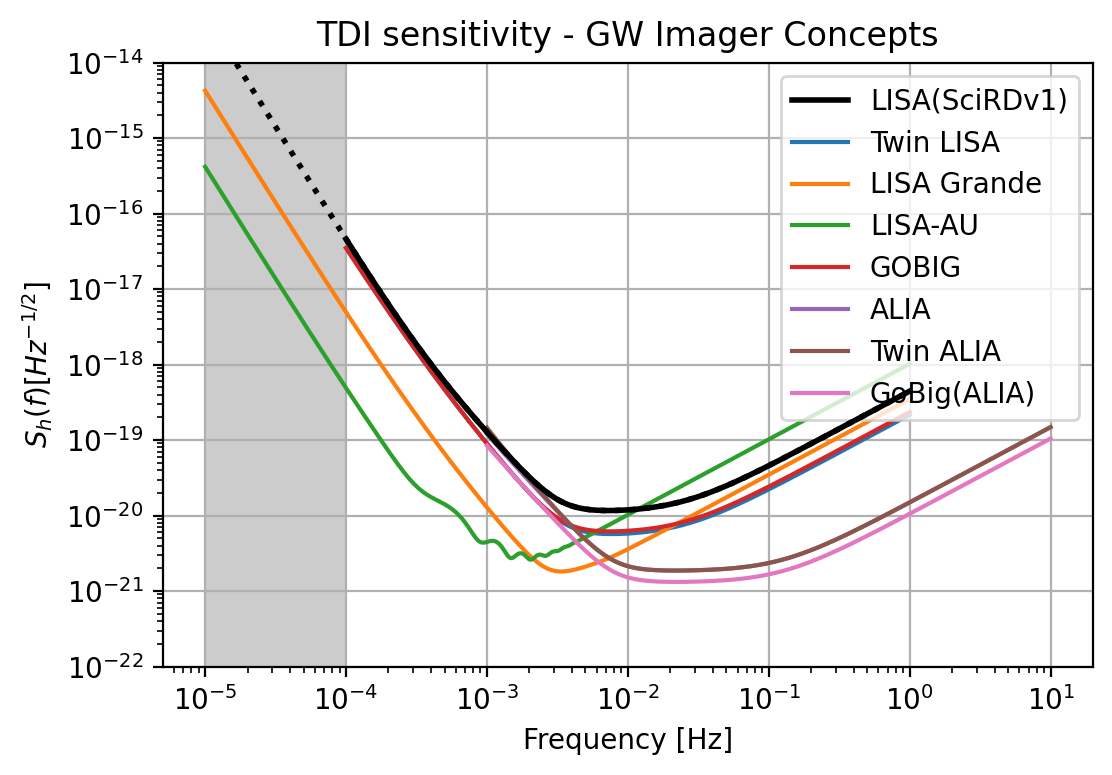

In [187]:
# f = np.logspace(-5,1,1000)

fig = plt.figure(figsize=(6,4),dpi=200)
ax = fig.add_subplot(1,1,1)

for m in missions:
    print(m)
    fr=np.array([0.00010, 0.00100, 0.01000, 0.10000, 1.00000])
    f = np.logspace(faxis[m][0],faxis[m][1], 1000 )
    model = eval('concepts.%s' % m)
    Sh = metrics.makeSensitivity(f, model, style = 'TN')
    Shr = metrics.makeSensitivity(fr, model, style = 'TN')
    if m == 'LISASciRDv1':
        #ax.plot(fr,np.sqrt(Shr),label=model.get('label'), color = 'r', ls='none', lw=2, zorder=len(m), marker = '.', markersize = '10')
        ax.plot(np.logspace(-5, 0, 1000 ),np.sqrt(metrics.makeSensitivity(np.logspace(-5, 0, 1000 ), model, style = 'TN')), color = 'k', ls=':', lw=2, zorder=len(m))
        ax.plot(f,np.sqrt(Sh),label=model.get('label'), color = 'k', ls='-', lw=2, zorder=len(m))
        print('f', 'S_h', sep='\t')
        for a, b in zip(fr,Shr):

            print(a, b, sep='\t')
    else:
        ax.plot(f,np.sqrt(Sh),label=model.get('label'))
        
ax.fill_between([1e-5, 1e-4], y1=1e-14, y2=1e-23, color= 'grey', alpha = 0.4, edgecolor='none')
plt.title(r'TDI sensitivity - GW Imager Concepts')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_h(f) [Hz^{-1/2}]$')
plt.ylim([1e-22,1e-14])
#plt.xlim([2e-5,1e0])
plt.legend(loc='upper right')
ax.grid(True)
plt.savefig('../plots/GWImager_sensitivities.png')
plt.savefig('../plots/GWImager_sensitivities.pdf')
plt.show()

In [188]:
(1.609385e-39 - 2.096656544353494e-39)/2.096656544353494e-39, (2.299120e-37 - 1.977854e-37)/2.299120e-37

(-0.23240408433406282, 0.13973433313615632)

In [189]:
# fig = plt.figure(figsize=(6,4),dpi=200)
# ax = fig.add_subplot(1,1,1)
# SNR = 5
# Tobs = 365*24*60*60
# for m in missions:
#     print(m)
#     f=np.logspace(faxis[m][0],faxis[m][1], 1000 )
#     model = eval('concepts.%s' % m)
#     Sh = metrics.makeSensitivity(f, model, style = 'TN')
#     S_strain = 4*Sh * SNR**2 / Tobs
#     ax.plot(f,np.sqrt(S_strain),label=model.get('label'))

# ax.axhline(y=10**(-24.5),color='r', ls='--', label='ALIA bucket level in Bender 2013')
# plt.title(r'Sensitivity for a SNR=5 source $T_{obs}$=1yr')
# ax.set_xscale('log')
# ax.set_yscale('log')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel(r'$S_h(f) [Hz^{-1/2}]$')
# #plt.ylim([5e-23,1e-16])
# plt.legend()
# ax.grid(True)
# #plt.savefig('../plots/GWImager_sensitivities.png')

### Now we plot with the galactic background

LISASciRDv1
TwinLISA
LISAGrande
LISAU
GoBIGLISA
ALIA
ALIAtwin
GoBIGALIA


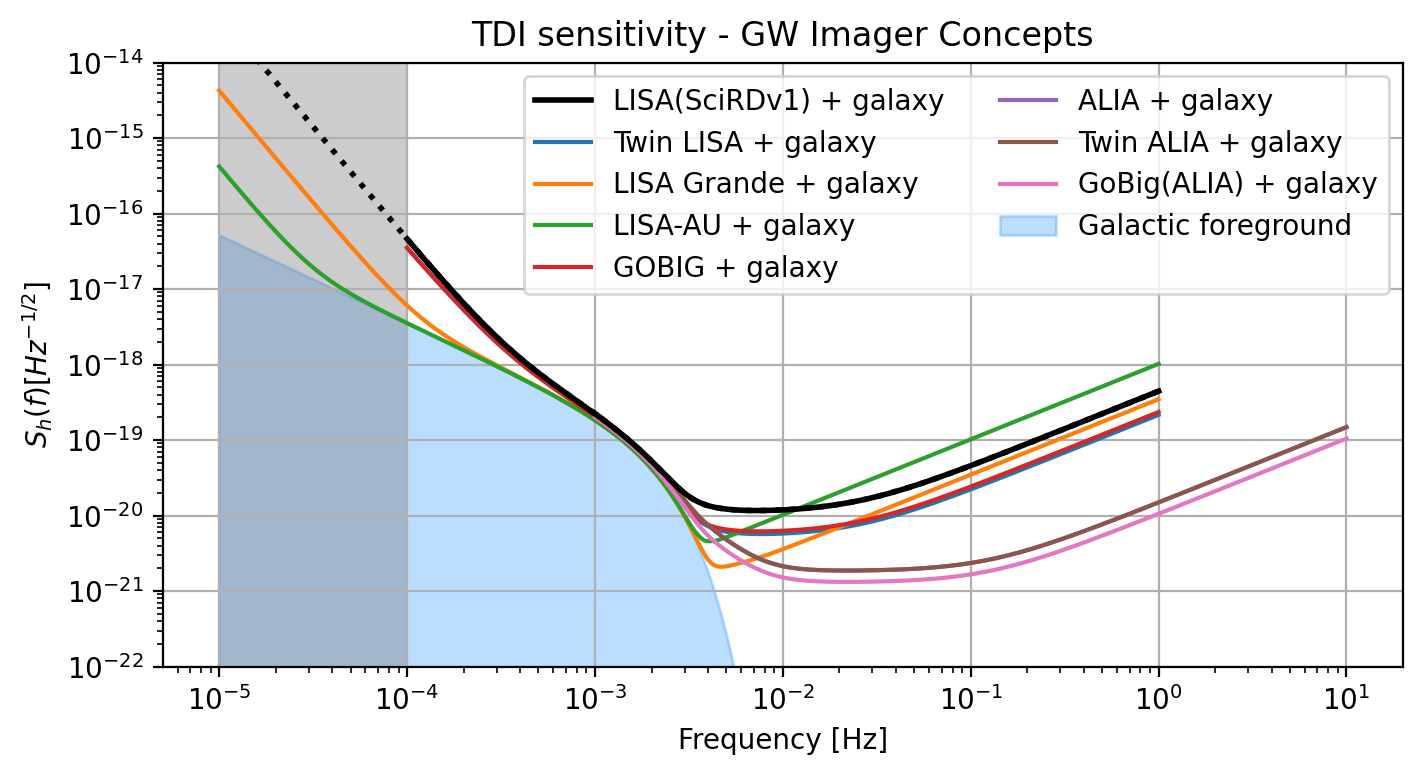

In [190]:
# f = np.logspace(-5,1,1000)

fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(1,1,1)

f_bg = np.logspace(-5,0, 1000 )
S_bg = bg.GBF_model_TN(f_bg, eval('concepts.%s' % missions[0]))

for m in missions:
    print(m)
    fr = np.array([0.00010, 0.00100, 0.01000, 0.10000, 1.00000])
    f  = np.logspace(faxis[m][0],faxis[m][1], 1000 )
    model = eval('concepts.%s' % m)
    model = bg.add2model(model)

    Sh = metrics.makeSensitivity(f, model, style = 'TN')
    Shr = metrics.makeSensitivity(fr, model, style = 'TN')
    if m == 'LISASciRDv1':
        #ax.plot(fr,np.sqrt(Shr),label=model.get('label'), color = 'r', ls='none', lw=2, zorder=len(m), marker = '.', markersize = '10')
        ax.plot(np.logspace(-5, 0, 1000 ),np.sqrt(metrics.makeSensitivity(np.logspace(-5, 0, 1000 ), model, style = 'TN')), color = 'k', ls=':', lw=2, zorder=len(m))
        ax.plot(f,np.sqrt(Sh),label=model.get('label'), color = 'k', ls='-', lw=2, zorder=len(m))
       # print('f', 'S_h', sep='\t')
        #for a, b in zip(fr,Shr):

           # print(a, b, sep='\t')
    else:
        ax.plot(f,np.sqrt(Sh),label=model.get('label'))
        
#ax.plot(f_bg,np.sqrt(S_bg),label=model.get('label'))
ax.fill_between(f_bg, np.sqrt(S_bg), y2=1e-23, color= 'dodgerblue', alpha = 0.3, label = 'Galactic foreground')
ax.fill_between([1e-5, 1e-4], y1=1e-14, y2=1e-23, color= 'grey', alpha = 0.4, edgecolor='none')
plt.title(r'TDI sensitivity - GW Imager Concepts')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_h(f) [Hz^{-1/2}]$')
plt.ylim([1e-22,1e-14])
#plt.xlim([2e-5,1e0])
plt.legend(ncol=2,loc='upper right')
ax.grid(True)
plt.savefig('../plots/GWImager_sensitivities_gal.png')
plt.savefig('../plots/GWImager_sensitivities_gal.pdf')
plt.show()

In [118]:

eval('concepts.%s' % missions[0])

{'label': 'LISA(SciRDv1)',
 'sqSacc_ASD': [[3e-15, 1.2e-18], [0, -1]],
 'sqSoms_ASD': [[1.5e-11, 6e-17], [0, -2]],
 'Lconst': 2500000000.0,
 'Dsep': 0,
 'Rorbit': 1.0,
 'Torbit': 1.0,
 'Nindep': 2,
 'SciDuration': 4}